
## **Atividade Prática: Redes Neurais Iniciais**
#### **Objetivo**:
- Introduzir os conceitos fundamentais de redes neurais.
- Implementar perceptron simples, MLP e CNN usando TensorFlow/Keras.
- Trabalhar com datasets reais para solidificar a compreensão prática.
- Analisar o impacto de hiperparâmetros nos modelos.



### **Bibliotecas Necessárias**

In [1]:

# Importando bibliotecas essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns


### **2. Datasets Utilizados**

#### **Numéricos: Breast Cancer Wisconsin Dataset**
- **Descrição**: Um dataset de classificação binária que contém informações de tumores, como textura, simetria e dimensões.  
- **Objetivo**: Classificar os tumores como **malignos** ou **benignos**.
- **Tamanho**: 569 amostras e 30 características.

#### **Imagens: MNIST Dataset**
- **Descrição**: Um dataset clássico para tarefas de classificação de imagens. Contém 60.000 imagens de treinamento e 10.000 imagens de teste de dígitos manuscritos de 0 a 9.  
- **Objetivo**: Classificar corretamente os dígitos com base nas imagens.

In [11]:


# Carregando o Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

# Resumo do Breast Cancer Dataset
print("Breast Cancer Dataset:")
print(f"Classes: {breast_cancer.target_names}")
print(f"Formato de X: {X_cancer.shape}")
print(f"Formato de y: {y_cancer.shape}")
print(f"Características: {breast_cancer.feature_names}")




Breast Cancer Dataset:
Classes: ['malignant' 'benign']
Formato de X: (569, 30)
Formato de y: (569,)
Características: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
# Carregando o MNIST Dataset
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = keras.datasets.mnist.load_data()

# Resumo do MNIST Dataset
print("\nMNIST Dataset:")
print(f"Formato de X_train: {X_mnist_train.shape}")
print(f"Formato de y_train: {y_mnist_train.shape}")
print(f"Formato de X_test: {X_mnist_test.shape}")


MNIST Dataset:
Formato de X_train: (60000, 28, 28)
Formato de y_train: (60000,)
Formato de X_test: (10000, 28, 28)


**Exemplo de algumas imagens do Dartaset MNIST**

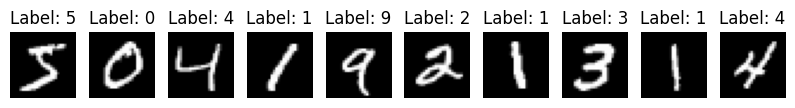

In [13]:
# Definir o número de imagens a serem exibidas
num_images = 10

# Plotar as primeiras 5 imagens do conjunto de treinamento
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_mnist_train[i], cmap='gray')  # Exibir imagem em tons de cinza
    plt.title(f'Label: {y_mnist_train[i]}')
    plt.axis('off')  # Desativar os eixos
plt.show()



### **Perceptron Simples**
#### **O que é um Perceptron Simples?**
O perceptron simples é a unidade mais básica de uma rede neural. Ele realiza uma **classificação linear** ao dividir o espaço de entrada em duas regiões separadas por uma reta (ou hiperplano em dimensões mais altas).  

#### **Arquitetura:**
- **Camada de Entrada**: Recebe os dados de entrada (características do dataset).  
- **Pesos**: São valores atribuídos a cada entrada, representando a importância relativa de cada característica.  
- **Função Soma**: Calcula uma combinação linear dos valores de entrada e seus respectivos pesos.  
- **Função de Ativação**: Decide se a saída será **1** ou **0** com base no valor da soma.

#### **Limitações:**
- O perceptron simples só resolve problemas **linearmente separáveis**, ou seja, quando as classes podem ser separadas por uma reta.








### **Perceptron Simples com Breast Cancer Dataset**

#### **Treinamento Básico**

In [14]:

# Pré-processamento
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X_cancer_scaled, y_cancer, test_size=0.3, random_state=42)

# Criando o modelo Perceptron
model = Sequential([
    Dense(1, input_dim=X_cancer.shape[1], activation='sigmoid')  # Perceptron simples
])

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Avaliação
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do Perceptron: {accuracy * 100:.2f}%")


c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6235 - loss: 0.6921 - val_accuracy: 0.7193 - val_loss: 0.5480
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7117 - loss: 0.5898 - val_accuracy: 0.7836 - val_loss: 0.4898
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7530 - loss: 0.5065 - val_accuracy: 0.8304 - val_loss: 0.4401
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8102 - loss: 0.4427 - val_accuracy: 0.8421 - val_loss: 0.3989
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8385 - loss: 0.4040 - val_accuracy: 0.8713 - val_loss: 0.3642
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8632 - loss: 0.3675 - val_accuracy: 0.8889 - val_loss: 0.3352
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8805 - loss: 0.3417 - val_accuracy: 0.9006 - val_loss: 0.3114
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8884 - loss: 0.3301 - val_accuracy: 0.9064 - val_loss


#### **Análise de Hiperparâmetros no Perceptron**

##### **Impacto da Taxa de Aprendizado**


Treinando com learning rate = 0.01

Treinando com learning rate = 0.001

Treinando com learning rate = 0.0001


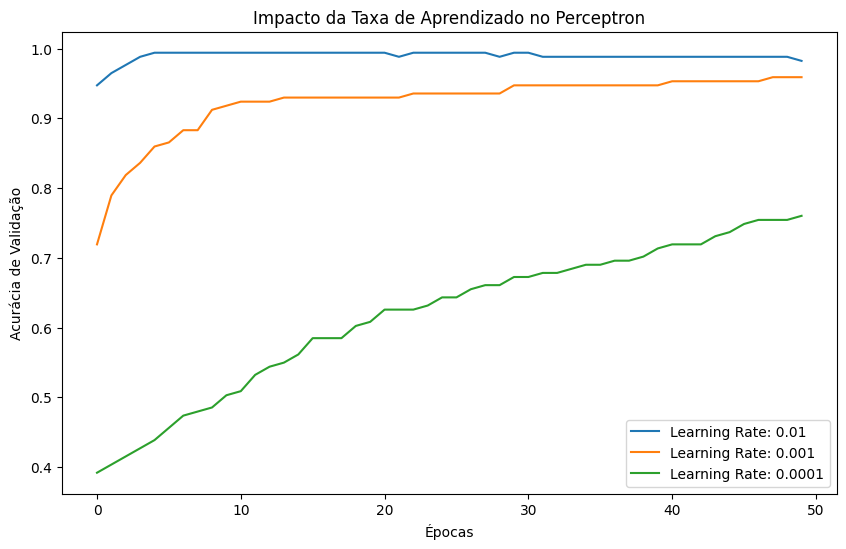

In [15]:


# Testando diferentes taxas de aprendizado
learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTreinando com learning rate = {lr}")

    perceptron = Sequential([Dense(1, input_dim=X_cancer.shape[1], activation='sigmoid')])
    perceptron.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

    history = perceptron.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    results[lr] = history.history['val_accuracy']

# Plotando os resultados
plt.figure(figsize=(10, 6))
for lr, acc in results.items():
    plt.plot(acc, label=f'Learning Rate: {lr}')
plt.title("Impacto da Taxa de Aprendizado no Perceptron")
plt.xlabel("Épocas")
plt.ylabel("Acurácia de Validação")
plt.legend()
plt.show()

##### **Impacto do Número de Épocas**

In [18]:

# Treinamento com diferentes números de épocas
epochs_list = [20,  30, 50,70, 100, 120 , 150]
for epochs in epochs_list:
    print(f"\nTreinando com {epochs} épocas")

    perceptron = Sequential([Dense(1, input_dim=X_cancer.shape[1], activation='sigmoid')])
    perceptron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = perceptron.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"Acurácia final com {epochs} épocas: {val_acc * 100:.2f}%")




Treinando com 20 épocas


c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácia final com 20 épocas: 94.15%

Treinando com 30 épocas
Acurácia final com 30 épocas: 95.32%

Treinando com 50 épocas
Acurácia final com 50 épocas: 97.08%

Treinando com 70 épocas
Acurácia final com 70 épocas: 98.25%

Treinando com 100 épocas
Acurácia final com 100 épocas: 98.83%

Treinando com 120 épocas
Acurácia final com 120 épocas: 97.08%

Treinando com 150 épocas
Acurácia final com 150 épocas: 99.42%



## **Perceptron Multicamadas (MLP)**

#### **O que é um Perceptron Multicamadas (MLP)?**
O **MLP** é uma rede neural feedforward que consiste em múltiplas camadas, incluindo camadas ocultas entre a camada de entrada e a camada de saída. Diferente do perceptron simples, o MLP pode resolver problemas **não linearmente separáveis**.

#### **Arquitetura do MLP**:
1. **Camada de Entrada**: Recebe as características do dataset.
2. **Camadas Ocultas**: São camadas intermediárias, responsáveis por aprender representações mais complexas dos dados.
3. **Camada de Saída**: Retorna a previsão. Para classificação binária, utiliza a função de ativação **sigmoide**, e para múltiplas classes, a função **softmax** é utilizada.

#### **Função de Ativação**:
- **ReLU** (Rectified Linear Unit) é amplamente utilizada nas camadas ocultas, pois ajuda a mitigar o problema do **desvanecimento do gradiente**, comum nas funções de ativação como a sigmoide.




### **Implementação de MLP no Breast Cancer Dataset**



In [19]:

# Criando o modelo MLP
mlp_model = Sequential([
    Dense(16, input_dim=X_cancer.shape[1], activation='relu'),  # Primeira camada oculta
    Dense(8, activation='relu'),                               # Segunda camada oculta
    Dense(1, activation='sigmoid')                             # Camada de saída
])

# Compilação
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
mlp_history = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Avaliação
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Acurácia do MLP: {mlp_accuracy * 100:.2f}%")



c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6394 - loss: 0.6615 - val_accuracy: 0.7661 - val_loss: 0.5912
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8344 - loss: 0.5680 - val_accuracy: 0.8947 - val_loss: 0.5057
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8989 - loss: 0.4996 - val_accuracy: 0.9532 - val_loss: 0.4297
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9069 - loss: 0.4220 - val_accuracy: 0.9532 - val_loss: 0.3613
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9382 - loss: 0.3558 - val_accuracy: 0.9532 - val_loss: 0.3003
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9079 - loss: 0.3131 - val_accuracy: 0.9532 - val_loss: 0.2483
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9498 - loss: 0.2538 - val_accuracy: 0.9532 - val_loss: 0.2068
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9555 - loss: 0.2205 - val_accuracy: 0.9591 - val_loss

#### **Análise de Hiperparâmetros no MLP**
Agora que você treinou o modelo MLP, vamos testar diferentes configurações de hiperparâmetros para ver como influenciam os resultados. Experimente variações como:

1. **Número de Camadas Ocultas**: Aumentar ou diminuir o número de camadas pode afetar a capacidade do modelo de aprender padrões complexos.
2. **Tamanho das Camadas**: Camadas maiores podem melhorar a capacidade do modelo, mas também podem aumentar o risco de overfitting.
3. **Função de Ativação**: Teste diferentes funções de ativação como **tanh** ou **sigmoid**.
4. **Número de Épocas**: Avalie o desempenho com diferentes números de épocas de treinamento.

c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_19188\3502528306.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])


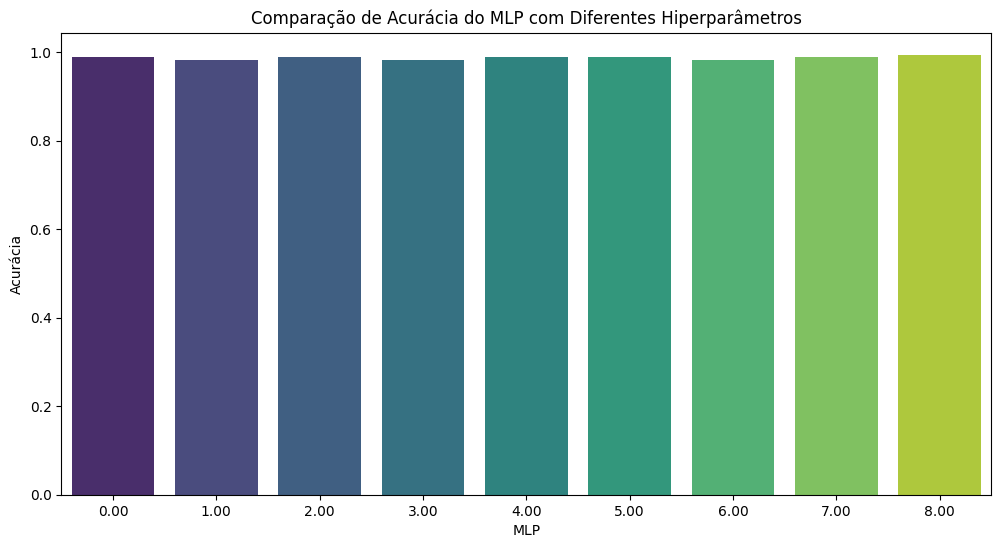

,Hidden Layers,Activation,Accuracy,MLP
0,"(10,)",relu,0.988304,mlp 1
1,"(10,)",tanh,0.982456,mlp 2
2,"(10,)",logistic,0.988304,mlp 3
3,"(20,)",relu,0.982456,mlp 4
4,"(20,)",tanh,0.988304,mlp 5
5,"(20,)",logistic,0.988304,mlp 6
6,"(30,)",relu,0.982456,mlp 7
7,"(30,)",tanh,0.988304,mlp 8
8,"(30,)",logistic,0.994152,mlp 9


In [20]:

# Variáveis para armazenar os resultados
hidden_layer_sizes = [(10,), (20,), (30,)]
activation_functions = ['relu', 'tanh', 'logistic']
results = []
mlp = []
id_mlp = 1

# Loop para treinar o MLP com diferentes hiperparâmetros
for layers in hidden_layer_sizes:
    for activation in activation_functions:
        mlp = MLPClassifier(hidden_layer_sizes=layers, activation=activation, max_iter=500, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((str(layers), activation, accuracy, f"mlp {id_mlp}"))
        id_mlp += 1

# Converter resultados para DataFrame para facilitar o gráfico
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Activation', 'Accuracy','MLP'])

# Plotar os gráficos de acurácia
plt.figure(figsize=(12, 6))
sns.barplot(x='MLP', y='Accuracy', hue='MLP', data=results_df, palette="viridis", orient='v')

# Formatar os rótulos do eixo X para exibir apenas 2 casas decimais
plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])
plt.title('Comparação de Acurácia do MLP com Diferentes Hiperparâmetros')
plt.ylabel('Acurácia')
plt.xlabel('MLP')
plt.show()
results_df



## **Redes Neurais Convolucionais (CNN)**

#### **O que são Redes Convolucionais?**
As **Redes Neurais Convolucionais (CNN)** são modelos especializados em lidar com dados espaciais, como **imagens**. Elas utilizam camadas convolucionais para detectar padrões locais, como bordas e texturas.

#### **Componentes principais de uma CNN**:
1. **Camada Convolucional**: Realiza a convolução dos filtros (kernels) nas imagens de entrada, extraindo características.
2. **Max Pooling**: Reduz a dimensionalidade da imagem, mantendo características importantes.
3. **Camada de Flatten**: Converte a matriz 2D em um vetor 1D para ser processada por camadas densas.
4. **Camadas Densas**: Realizam a classificação baseada nas características extraídas.





### **Implementação de CNN no MNIST Dataset**


In [21]:

# Normalização do MNIST
X_mnist_train = X_mnist_train / 255.0
X_mnist_test = X_mnist_test / 255.0

# Expandindo a dimensão para 4D (necessário para CNN)
X_mnist_train = X_mnist_train[..., np.newaxis]
X_mnist_test = X_mnist_test[..., np.newaxis]

# Criando o modelo CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes para dígitos 0-9
])

# Compilação
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
cnn_history = cnn_model.fit(X_mnist_train, y_mnist_train, epochs=5, validation_data=(X_mnist_test, y_mnist_test))

# Avaliação
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_mnist_test, y_mnist_test)
print(f"Acurácia da CNN: {cnn_accuracy * 100:.2f}%")



c:\Users\IvoAg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8999 - loss: 0.3368 - val_accuracy: 0.9763 - val_loss: 0.0725
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9806 - loss: 0.0610 - val_accuracy: 0.9814 - val_loss: 0.0572
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9879 - loss: 0.0397 - val_accuracy: 0.9851 - val_loss: 0.0477
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9834 - val_loss: 0.0553
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9835 - val_loss: 0.0513
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9793 - loss: 0.0661
Acurácia da CNN: 98.35%



#### **Análise de Hiperparâmetros na CNN**
Experimente as seguintes variações no modelo para analisar o impacto dos hiperparâmetros:

1. **Número de Filtros (Convoluções)**: Aumente ou diminua o número de filtros nas camadas convolucionais.
2. **Tamanho do Filtro**: Teste diferentes tamanhos de filtros (ex. \(3 X 3\), \(5 X 5\)).
3. **Número de Épocas**: O número de épocas pode afetar o overfitting. Experimente com **10, 20 ou 50** épocas.
4. **Função de Ativação**: Teste outras funções como **tanh** ou **Leaky ReLU**.
5. **Otimizador :** Adam, SGD, Nadan


C:\Users\IvoAg\AppData\Local\Temp\ipykernel_19188\1129344096.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])


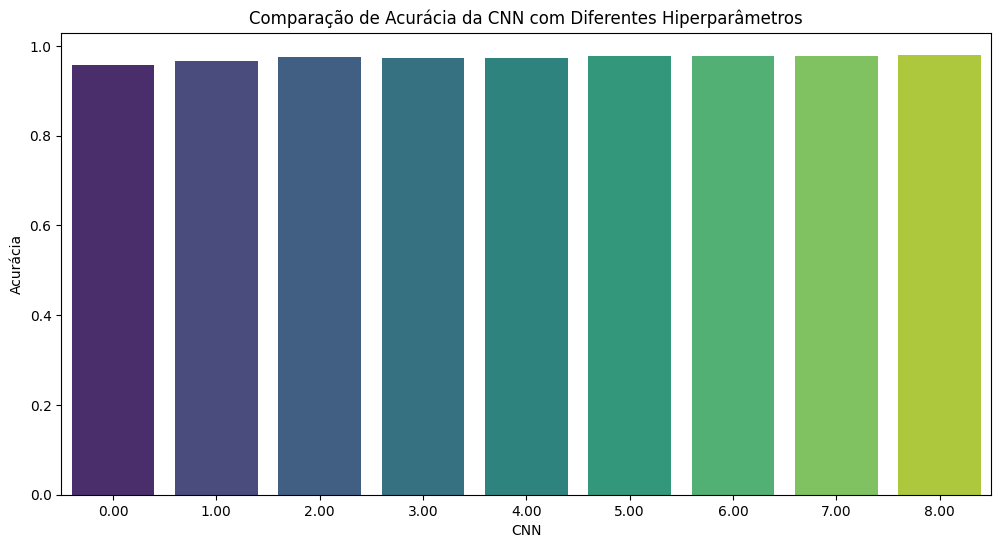

,Filters,Kernel Size,Accuracy,CNN
0,4,"(3, 3)",0.9576,cnn 1
1,4,"(5, 5)",0.9673,cnn 2
2,4,"(7, 7)",0.9748,cnn 3
3,8,"(3, 3)",0.9728,cnn 4
4,8,"(5, 5)",0.9722,cnn 5
5,8,"(7, 7)",0.9782,cnn 6
6,16,"(3, 3)",0.9774,cnn 7
7,16,"(5, 5)",0.9786,cnn 8
8,16,"(7, 7)",0.9805,cnn 9


In [22]:
# Definir alguns hiperparâmetros para comparação
filter_sizes = [4, 8, 16]
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
results_cnn = []
cnn = []
id_cnn = 1

# Loop para treinar a CNN com diferentes hiperparâmetros
for filters in filter_sizes:
    for kernel_size in kernel_sizes:
        cnn_model = Sequential([
            Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])

        cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Treinando o modelo
        history = cnn_model.fit(X_mnist_train, y_mnist_train, epochs=1, batch_size=64, validation_data=(X_mnist_test, y_mnist_test), verbose=0)

        # Acurácia final de validação
        accuracy = history.history['val_accuracy'][-1]

        # Armazenando os resultados
        results_cnn.append((str(filters), str(kernel_size), accuracy, f"cnn {id_cnn}"))
        id_cnn += 1

# Converter resultados para DataFrame
results_cnn_df = pd.DataFrame(results_cnn, columns=['Filters', 'Kernel Size', 'Accuracy', 'CNN'])

# Plotar os gráficos de acurácia
plt.figure(figsize=(12, 6))
sns.barplot(x='CNN', y='Accuracy', data=results_cnn_df, palette="viridis", orient='v', hue='CNN')

# Formatar os rótulos do eixo X para exibir apenas 2 casas decimais
plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])

plt.title('Comparação de Acurácia da CNN com Diferentes Hiperparâmetros')
plt.ylabel('Acurácia')
plt.xlabel('CNN')
plt.show()

results_cnn_df
